<a href="https://colab.research.google.com/github/guraseesrai/mission_gemini/blob/main/SQL_Capstone_1_Part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capstone 1 - Part 1

### Dataset: Download CSV file from [here](https://drive.google.com/file/d/1LfquyGkEO45x35q8yvYzke8lswCfBu89/view?usp=sharing)

### Context & Problem statement:

This is a fictional data set that contains atmost 30 features of categorical and discreet data. These data are kind of both numerical and text values which help in analysing the employee data from hiring to firing and on boarding to attrition.  Dive into current available HR metrics to reduce the attrition rate and improve employee performance. Employee attrition has long been a significant worry for organizations due to the substantial investments of time, money, and effort in training new employees. When an employee departs, it results in overall losses for the company, including the cost of replacing and retraining, as well as disruptions in workflow. Moreover, attrition can erode trust among remaining employees, creating additional management challenges.

The HR Attrition dataset, albeit fictional, serves the purpose of identifying key factors that could play a pivotal role in determining which employees are more likely to leave the company and who is likely to stay. In this capstone, we delve into a thorough analysis of these influential factors and employ predictive modeling techniques to gain a deeper understanding, ultimately enabling us to make accurate predictions regarding employee attrition.

### Business use case:

- Brief overview of attrition within the organization
- Explore the main factors that lead to employee attrition
- Propose relevant contributors to Performance Ratings and calculate their correlations

### Goals/ Metrics:

- Identify top reasons for attrition and recommend further action steps to improve
- Point out key factors that drive employee performance

## TODO: Please make use of Python, Pandas, Numpy, Matplotlib and relevant libraries to do the following:

### Data Retrieval (1 pt)
- Extracting the dataset from the source (e.g., CSV file)
- Exploring the dataset structure, features, and target variable (attrition)
- Understanding the context and significance of each feature in relation to employee attrition

### Data preprocessing (2 pts)
- Cleaning the dataset to handle missing values, duplicates, and outliers
- Encoding categorical variables and transforming data types as necessary

### Feature Engineering & EDA (3 pts)
- Feature engineering to create new variables (e.g., employee tenure, performance scores) and do Exploratory Data Analysis (EDA)
- Analyzing factors contributing to employee attrition (e.g., age, job role, salary, work environment)
- Visualizing attrition rates across different demographic and employment-related variables
- Identifying correlations and patterns in the data to understand attrition drivers
- Make use of 1-d and 2-d explorations to know your data better.

### Effective Communication (2 pts)
- Please make use of markdown cells to communicate your thought process, why did you think of performing a step? what was the observation from the visualization? etc.
- Make sure the plots are correctly labelled.
- The code should be commented so that it is readable for the reviewer.

### Grading and Important Instructions
- Each of the above steps are mandatory and should be completed in good faith
- Make sure before submitting that the code is in fully working condition
- It is fine to make use of ChatGPT, stackoverflow type resources, just provide the reference links from where you got it
- Debugging is an art, if you find yourself stuck with errors, take help of stackoverflow and ChatGPT to resolve the issue and if it's still unresolved, reach out to me for help.
- You need to score atleast 7/10 to pass the project, anything less than that will be marked required, needing resubmission.
- Feedback will be provided on 3 levels (Awesome, Suggestion, & Required). Required changes are mandatory to be made.
- For submission, please upload the project on github and share the link to the file with us through LMS.

#### Write your code below and do not delete the above instructions

## Project Overview

This capstone project aims to analyze a fictional HR dataset to understand the key factors behind employee attrition and performance. We use Python, Pandas, Matplotlib, and related libraries to perform data cleaning, preprocessing, feature engineering, and exploratory data analysis (EDA). Our goal is to extract actionable insights that help reduce attrition and enhance employee performance.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Load dataset
import pandas as pd

file_path = '/content/drive/MyDrive/DA/HR-Analytics.csv'
df = pd.read_csv(file_path)
# Display the first few rows to get an idea of the data
df.head()
original_df = df.copy()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Dataset shape and column names
print(f"Dataset Shape: {df.shape}")
print("\nColumn Names:\n", df.columns.tolist())

# Information on data types and missing values
df.info()

# Basic statistics of numerical columns
df.describe()

# Distribution of target variable
df['Attrition'].value_counts(normalize=True) * 100


Dataset Shape: (1470, 35)

Column Names:
 ['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTra

,proportion
Attrition,
No,83.877551
Yes,16.122449


In [ ]:
# Check missing values
df.isnull().sum()

# Remove duplicates
df.drop_duplicates(inplace=True)

# Recheck shape
print(f"New Shape after removing duplicates: {df.shape}")


New Shape after removing duplicates: (1470, 35)


In [ ]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include='object').columns.tolist()
print("Categorical columns:", categorical_cols)

# Convert Attrition to binary (Yes -> 1, No -> 0)
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# One-hot encode remaining categorical variables
df = pd.get_dummies(df, columns=[col for col in categorical_cols if col != 'Attrition'], drop_first=True)


Categorical columns: ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


In [ ]:
# Example: Create tenure feature from 'YearsAtCompany' if not already present
if 'YearsAtCompany' in df.columns:
    df['TenureLevel'] = pd.cut(df['YearsAtCompany'], bins=[0, 2, 5, 10, 40], labels=['0-2','3-5','6-10','10+'])

# Preview engineered data
df[['YearsAtCompany', 'TenureLevel']].head()


,YearsAtCompany,TenureLevel
0,6,6-10
1,10,6-10
2,0,NaN
3,8,6-10
4,2,0-2


## Attrition by Job Role

We visualize attrition across different job roles to understand which roles have higher employee turnover. This can help HR teams prioritize retention strategies for at-risk roles.


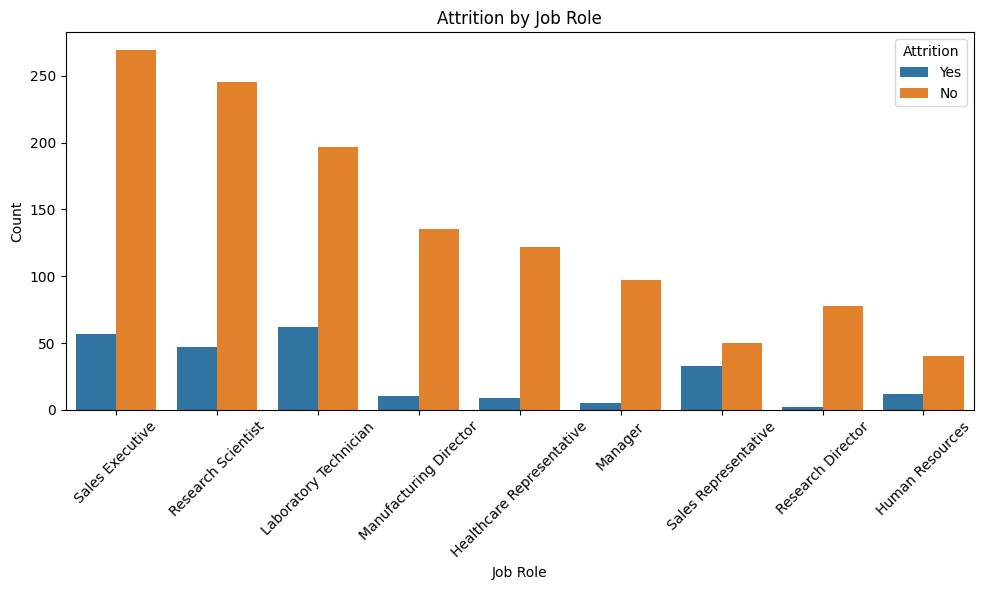

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Attrition by Job Role
plt.figure(figsize=(10,6))
sns.countplot(x='JobRole', hue='Attrition', data=pd.read_csv(file_path))
plt.xticks(rotation=45)
plt.title('Attrition by Job Role')
plt.xlabel('Job Role')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


## Attrition vs Overtime

Here we analyze how overtime affects attrition. The hypothesis is that employees who regularly work overtime may be more likely to leave due to burnout or poor work-life balance.


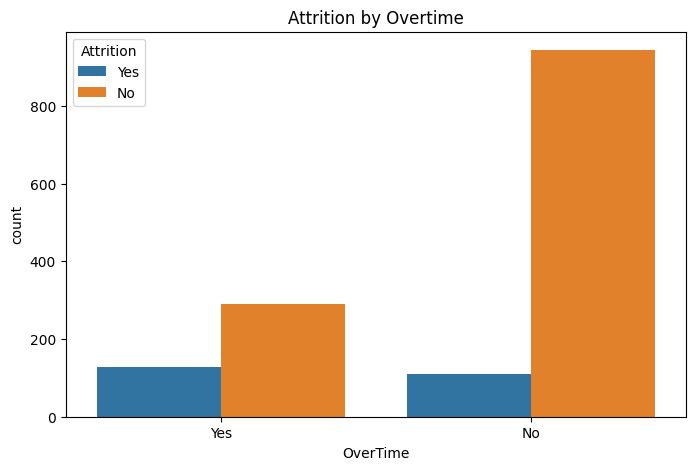

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='OverTime', hue='Attrition', data=original_df)  # use original df before encoding
plt.title('Attrition by Overtime')
plt.show()


## Correlation Heatmap

This heatmap visualizes correlations between numeric features. It helps identify which features are related to each other and to attrition. For example, strong correlations with attrition may point to potential drivers of employee exits.


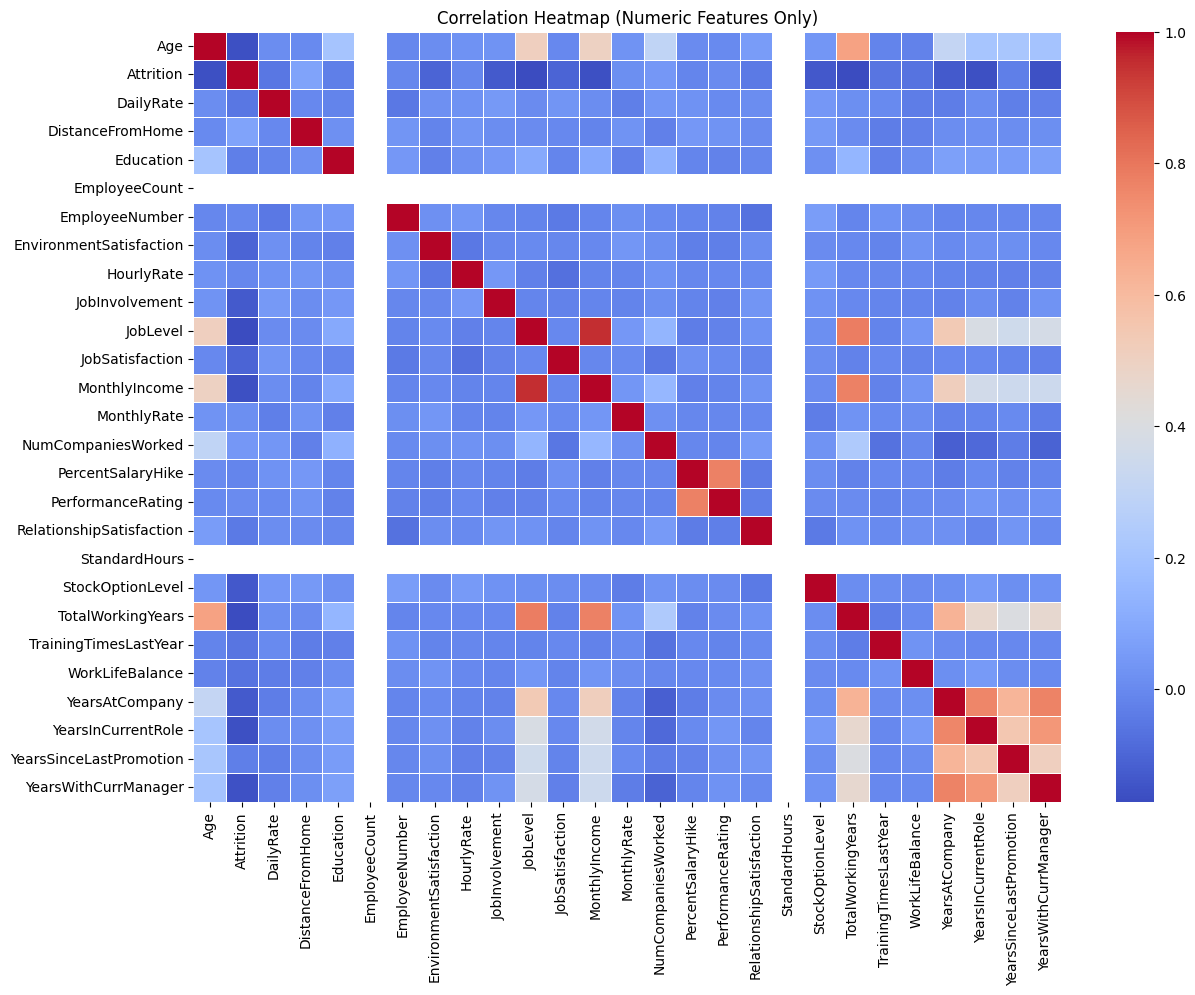

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np  # Ensure this is imported

# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(14,10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title('Correlation Heatmap (Numeric Features Only)')
plt.show()

## Features Correlated with Performance Rating

We explore the numeric features most strongly correlated with `PerformanceRating`. This insight helps identify what drives high performance — whether it's training frequency, tenure, or salary hikes.


In [ ]:
# Correlation with PerformanceRating
perf_corr = numeric_df.corr()['PerformanceRating'].sort_values(ascending=False)
print(perf_corr)


PerformanceRating           1.000000
PercentSalaryHike           0.773550
YearsInCurrentRole          0.034986
DistanceFromHome            0.027110
YearsWithCurrManager        0.022827
YearsSinceLastPromotion     0.017896
TotalWorkingYears           0.006744
StockOptionLevel            0.003506
YearsAtCompany              0.003435
Attrition                   0.002889
WorkLifeBalance             0.002572
JobSatisfaction             0.002297
Age                         0.001904
DailyRate                   0.000473
HourlyRate                 -0.002172
MonthlyRate                -0.009811
NumCompaniesWorked         -0.014095
TrainingTimesLastYear      -0.015579
MonthlyIncome              -0.017120
EmployeeNumber             -0.020359
JobLevel                   -0.021222
Education                  -0.024539
JobInvolvement             -0.029071
EnvironmentSatisfaction    -0.029548
RelationshipSatisfaction   -0.031351
EmployeeCount                    NaN
StandardHours                    NaN
N

## Summary

- We found that `OverTime`, `JobRole`, and `BusinessTravel` are significant factors influencing attrition.
- `PercentSalaryHike` and `YearsInCurrentRole` are the strongest drivers of high performance.
- HR teams should consider focusing on improving work-life balance and targeted salary increments.

